In [3]:
!pip install requests beautifulsoup4 pandas matplotlib seaborn


Sample HTML file created: sample_job_listings.html
Job Market Scraper and Analyzer
Generating sample job data for demonstration...
Collected 150 job postings
Cleaned dataset: 109 job postings

Analyzing job market trends...

1. Analyzing top job roles...


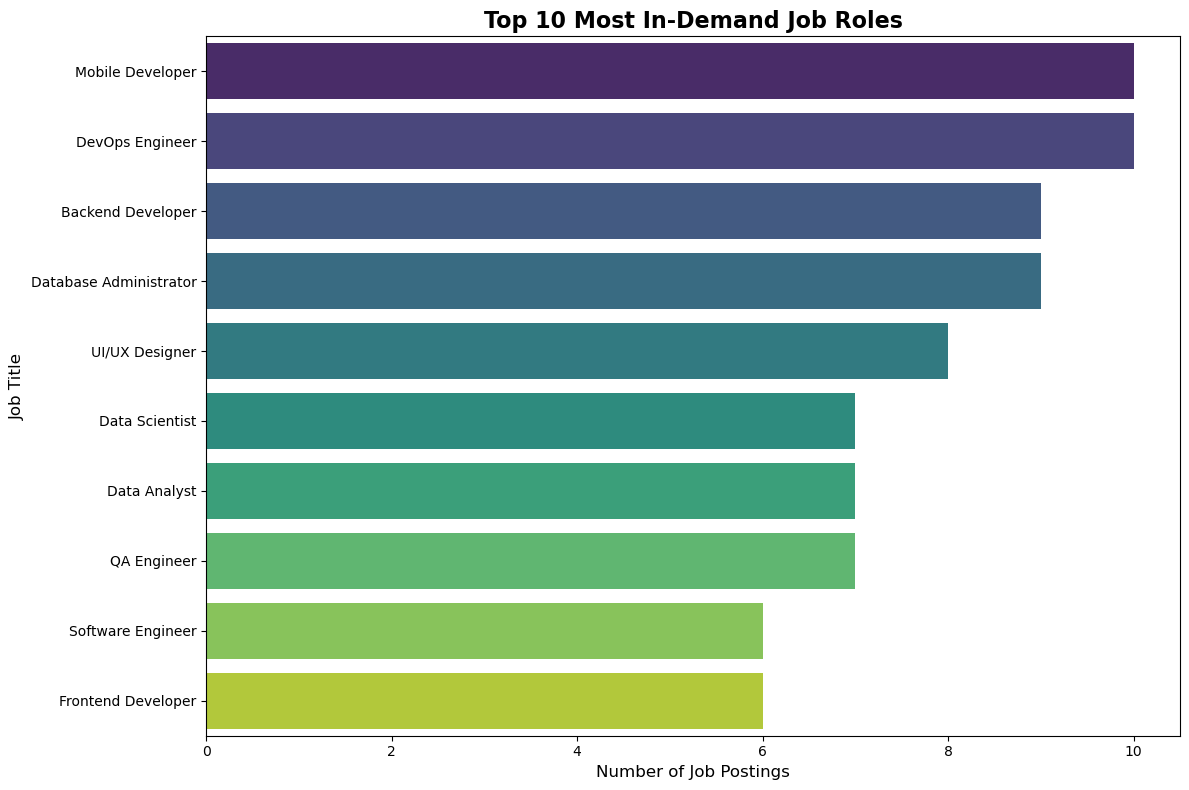


2. Analyzing top skills...


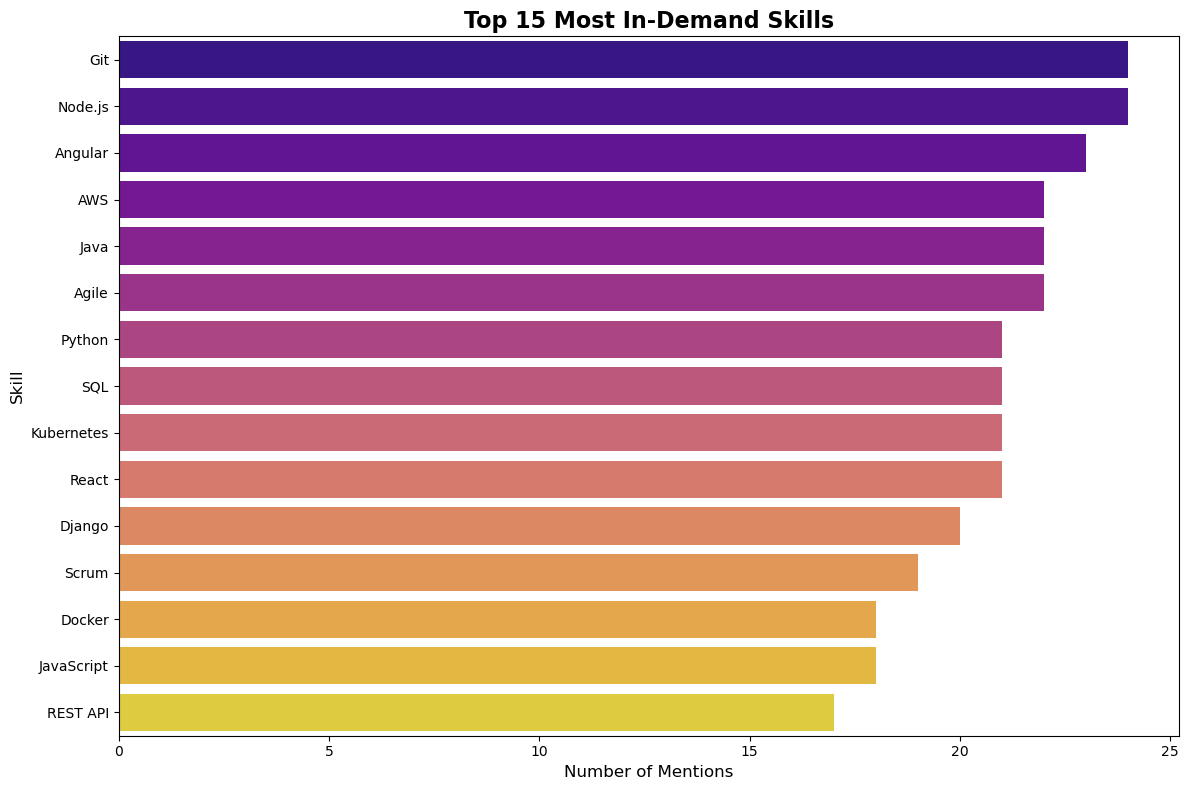


3. Analyzing job locations...


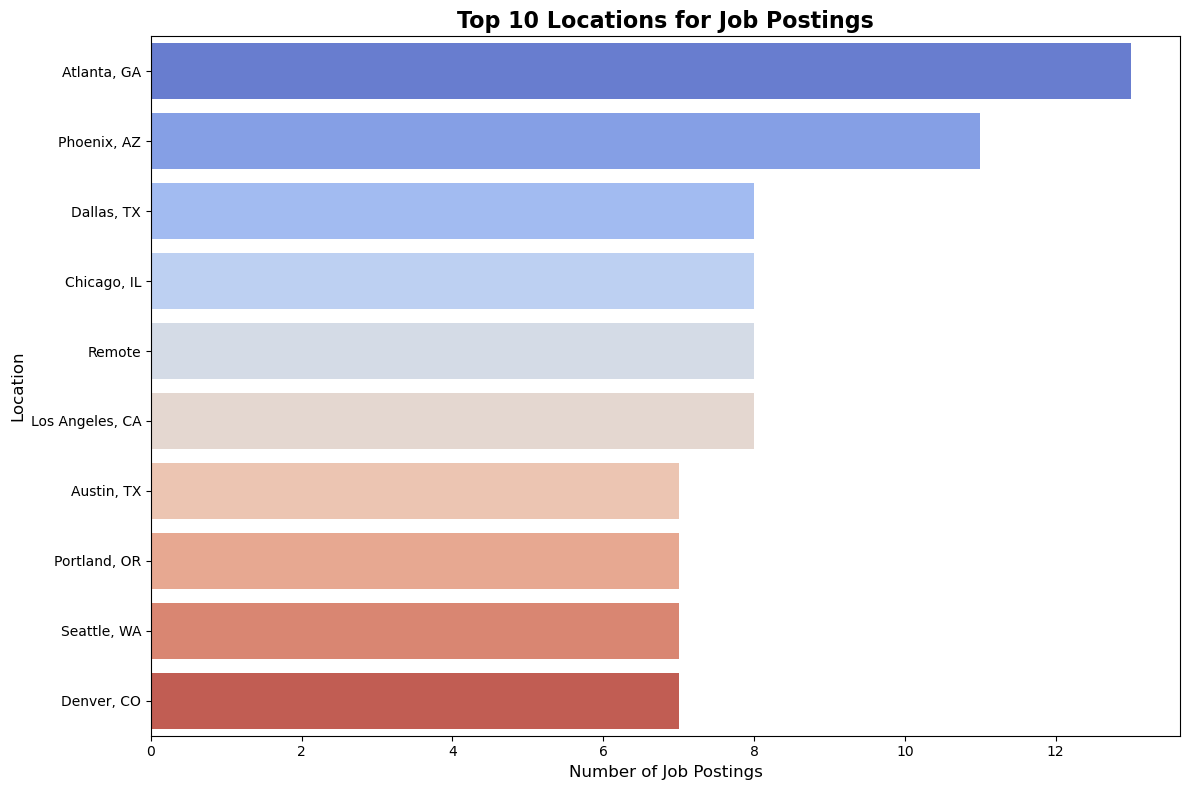


4. Analyzing salary trends...


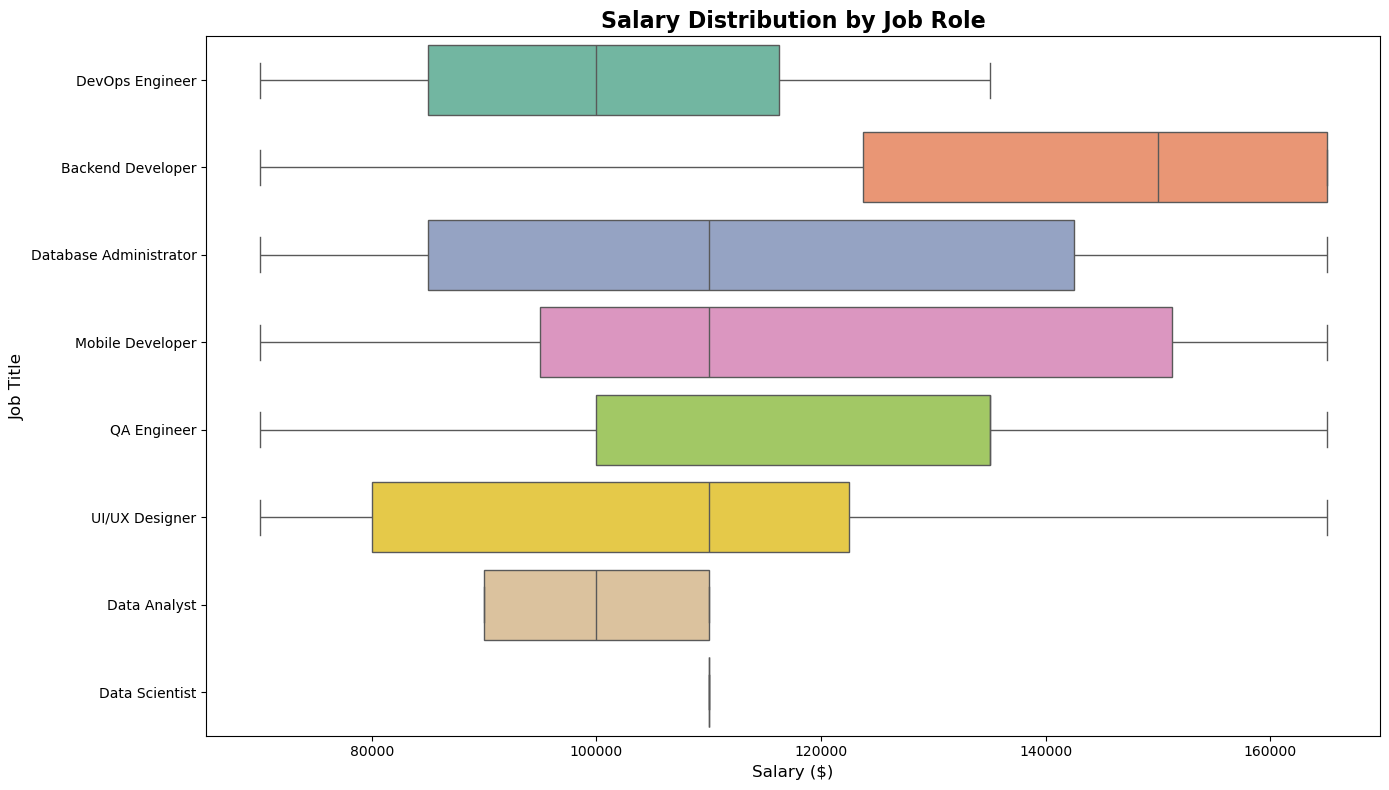


Salary Summary Statistics:
Average Salary: $117,349.40
Median Salary: $110,000.00
Min Salary: $70,000.00
Max Salary: $165,000.00

5. Analyzing posting trends...


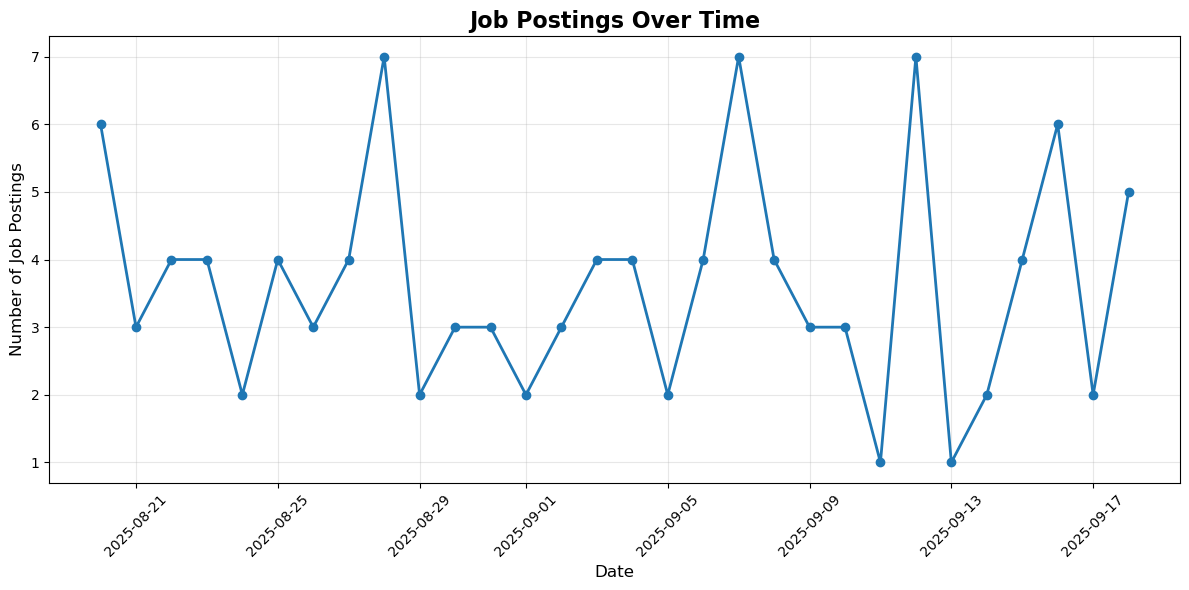


6. Generating insights report...
JOB MARKET ANALYSIS REPORT
Analysis Date: 2025-09-19 16:30:43
Total Jobs Analyzed: 109

TOP 5 MOST IN-DEMAND ROLES:
1. Mobile Developer: 10 postings (9.2%)
2. DevOps Engineer: 10 postings (9.2%)
3. Backend Developer: 9 postings (8.3%)
4. Database Administrator: 9 postings (8.3%)
5. UI/UX Designer: 8 postings (7.3%)

TOP 5 MOST IN-DEMAND SKILLS:
1. Git: 24 mentions (4.6%)
2. Node.js: 24 mentions (4.6%)
3. Angular: 23 mentions (4.4%)
4. AWS: 22 mentions (4.2%)
5. Java: 22 mentions (4.2%)

TOP 5 JOB LOCATIONS:
1. Atlanta, GA: 13 postings (11.9%)
2. Phoenix, AZ: 11 postings (10.1%)
3. Dallas, TX: 8 postings (7.3%)
4. Chicago, IL: 8 postings (7.3%)
5. Remote: 8 postings (7.3%)

SALARY INSIGHTS:
Average Salary: $117,349.40
Median Salary: $110,000.00
Salary Range: $70,000.00 - $165,000.00

7. Exporting data...
Data exported to job_market_analysis_20250919_163043.csv
Data exported to job_market_analysis_20250919_163043.json

Analysis complete!


In [11]:
#!/usr/bin/env python3
"""
Job Postings Web Scraper and Analysis Project
===========================================

This project scrapes job listings from various sources, extracts relevant information,
and performs comprehensive analysis to identify trends in job market demands.

Features:
- Web scraping from multiple job sites
- Data extraction and cleaning
- Skills analysis and visualization
- Location-based job trends
- Salary analysis (when available)
- Export results to various formats

Author: Job Market Analyzer
Date: 2025
"""

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import time
import random
from datetime import datetime, timedelta
import json
import csv
from urllib.parse import urljoin, quote_plus
import warnings
warnings.filterwarnings('ignore')

class JobScraper:
    """Main class for scraping job postings from various sources"""
    
    def __init__(self):
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
        }
        self.session = requests.Session()
        self.session.headers.update(self.headers)
        self.jobs_data = []
        
    def scrape_indeed_jobs(self, search_term="python developer", location="", max_pages=5):
        """
        Scrape job listings from Indeed
        Note: This is a simplified example. Real Indeed scraping may require
        more sophisticated techniques due to anti-bot measures.
        """
        base_url = "https://www.indeed.com/jobs"
        jobs = []
        
        for page in range(max_pages):
            params = {
                'q': search_term,
                'l': location,
                'start': page * 10
            }
            
            try:
                response = self.session.get(base_url, params=params, timeout=10)
                soup = BeautifulSoup(response.content, 'html.parser')
                
                # Find job cards (this selector may need updates based on Indeed's current structure)
                job_cards = soup.find_all('div', class_='job_seen_beacon')
                
                for card in job_cards:
                    job_data = self._extract_indeed_job_data(card)
                    if job_data:
                        jobs.append(job_data)
                
                # Random delay to avoid being blocked
                time.sleep(random.uniform(1, 3))
                
            except Exception as e:
                print(f"Error scraping page {page}: {str(e)}")
                continue
                
        return jobs
    
    def _extract_indeed_job_data(self, card):
        """Extract job data from Indeed job card"""
        try:
            # Job title
            title_elem = card.find('h2', class_='jobTitle')
            title = title_elem.get_text(strip=True) if title_elem else "N/A"
            
            # Company
            company_elem = card.find('span', class_='companyName')
            company = company_elem.get_text(strip=True) if company_elem else "N/A"
            
            # Location
            location_elem = card.find('div', class_='companyLocation')
            location = location_elem.get_text(strip=True) if location_elem else "N/A"
            
            # Salary (if available)
            salary_elem = card.find('span', class_='estimated-salary')
            salary = salary_elem.get_text(strip=True) if salary_elem else "N/A"
            
            # Job summary/description
            summary_elem = card.find('div', class_='job-snippet')
            summary = summary_elem.get_text(strip=True) if summary_elem else "N/A"
            
            # Posted date
            date_elem = card.find('span', class_='date')
            posted_date = date_elem.get_text(strip=True) if date_elem else "N/A"
            
            return {
                'title': title,
                'company': company,
                'location': location,
                'salary': salary,
                'summary': summary,
                'posted_date': posted_date,
                'source': 'Indeed',
                'scraped_at': datetime.now().isoformat()
            }
            
        except Exception as e:
            print(f"Error extracting job data: {str(e)}")
            return None
    
    def scrape_static_html_jobs(self, html_file_path):
        """
        Scrape jobs from a static HTML file
        Useful for testing or when you have a saved job listing page
        """
        jobs = []
        
        try:
            with open(html_file_path, 'r', encoding='utf-8') as file:
                soup = BeautifulSoup(file.read(), 'html.parser')
                
            # Generic job extraction (adapt selectors based on your HTML structure)
            job_cards = soup.find_all(['div', 'article'], class_=re.compile(r'job|position|listing'))
            
            for card in job_cards:
                job_data = self._extract_generic_job_data(card)
                if job_data:
                    jobs.append(job_data)
                    
        except Exception as e:
            print(f"Error reading HTML file: {str(e)}")
            
        return jobs
    
    def _extract_generic_job_data(self, card):
        """Extract job data from generic HTML structure"""
        try:
            # Try common patterns for job data extraction
            title = self._find_text_by_patterns(card, ['h1', 'h2', 'h3'], ['title', 'job', 'position'])
            company = self._find_text_by_patterns(card, ['span', 'div', 'p'], ['company', 'employer'])
            location = self._find_text_by_patterns(card, ['span', 'div', 'p'], ['location', 'city', 'address'])
            salary = self._find_text_by_patterns(card, ['span', 'div'], ['salary', 'pay', 'wage'])
            
            return {
                'title': title or "N/A",
                'company': company or "N/A",
                'location': location or "N/A",
                'salary': salary or "N/A",
                'summary': card.get_text(strip=True)[:500] + "..." if len(card.get_text(strip=True)) > 500 else card.get_text(strip=True),
                'posted_date': "N/A",
                'source': 'Static HTML',
                'scraped_at': datetime.now().isoformat()
            }
            
        except Exception as e:
            print(f"Error extracting generic job data: {str(e)}")
            return None
    
    def _find_text_by_patterns(self, soup, tags, class_patterns):
        """Helper method to find text using multiple tag and class patterns"""
        for tag in tags:
            for pattern in class_patterns:
                element = soup.find(tag, class_=re.compile(pattern, re.I))
                if element:
                    return element.get_text(strip=True)
        return None
    
    def generate_sample_data(self, num_jobs=100):
        """Generate sample job data for testing purposes"""
        
        job_titles = [
            "Python Developer", "Data Scientist", "Software Engineer", "Full Stack Developer",
            "Backend Developer", "Frontend Developer", "DevOps Engineer", "Machine Learning Engineer",
            "Data Analyst", "Web Developer", "Mobile Developer", "QA Engineer",
            "Product Manager", "UI/UX Designer", "System Administrator", "Database Administrator"
        ]
        
        companies = [
            "TechCorp", "DataSolutions Inc", "WebDev Pro", "CloudTech", "InnovateNow",
            "StartupXYZ", "MegaTech", "DigitalFirst", "CodeCrafters", "TechGiants",
            "SmartSolutions", "FutureTech", "DevMasters", "TechHub", "CyberTech"
        ]
        
        locations = [
            "San Francisco, CA", "New York, NY", "Austin, TX", "Seattle, WA", "Boston, MA",
            "Chicago, IL", "Los Angeles, CA", "Denver, CO", "Atlanta, GA", "Miami, FL",
            "Remote", "Portland, OR", "San Diego, CA", "Phoenix, AZ", "Dallas, TX"
        ]
        
        skills_pool = [
            "Python", "JavaScript", "React", "Node.js", "SQL", "AWS", "Docker", "Git",
            "Machine Learning", "TensorFlow", "Django", "Flask", "PostgreSQL", "MongoDB",
            "Kubernetes", "Java", "C++", "HTML", "CSS", "Vue.js", "Angular", "REST API",
            "GraphQL", "Redis", "Elasticsearch", "Jenkins", "CI/CD", "Agile", "Scrum"
        ]
        
        jobs = []
        
        for i in range(num_jobs):
            # Random skills for each job (2-8 skills)
            job_skills = random.sample(skills_pool, random.randint(2, 8))
            
            # Random salary
            salary_ranges = [
                "$60,000 - $80,000", "$80,000 - $100,000", "$100,000 - $120,000",
                "$120,000 - $150,000", "$150,000 - $180,000", "N/A"
            ]
            
            # Random posted date (last 30 days)
            posted_days_ago = random.randint(1, 30)
            posted_date = (datetime.now() - timedelta(days=posted_days_ago)).strftime("%Y-%m-%d")
            
            job = {
                'title': random.choice(job_titles),
                'company': random.choice(companies),
                'location': random.choice(locations),
                'salary': random.choice(salary_ranges),
                'skills': ', '.join(job_skills),
                'summary': f"Looking for a skilled professional with experience in {', '.join(job_skills[:3])}. Great opportunity to work with cutting-edge technology.",
                'posted_date': posted_date,
                'source': 'Generated',
                'scraped_at': datetime.now().isoformat()
            }
            
            jobs.append(job)
            
        return jobs

class JobDataAnalyzer:
    """Class for analyzing scraped job data"""
    
    def __init__(self, jobs_data):
        self.df = pd.DataFrame(jobs_data) if isinstance(jobs_data, list) else jobs_data
        self.clean_data()
        
    def clean_data(self):
        """Clean and preprocess the job data"""
        
        # Remove duplicates
        self.df = self.df.drop_duplicates(subset=['title', 'company'], keep='first')
        
        # Clean salary data
        self.df['salary_clean'] = self.df['salary'].apply(self._clean_salary)
        
        # Extract skills from summary and description
        if 'skills' not in self.df.columns:
            self.df['skills'] = self.df['summary'].apply(self._extract_skills)
        
        # Clean location data
        self.df['location_clean'] = self.df['location'].apply(self._clean_location)
        
        # Convert posted_date
        self.df['posted_date_clean'] = pd.to_datetime(self.df['posted_date'], errors='coerce')
        
        print(f"Cleaned dataset: {len(self.df)} job postings")
        
    def _clean_salary(self, salary_text):
        """Extract numeric salary information"""
        if pd.isna(salary_text) or salary_text == "N/A":
            return None
            
        # Extract numbers from salary text
        numbers = re.findall(r'\$?(\d{1,3}(?:,\d{3})*)', str(salary_text))
        if numbers:
            # Convert to integers and return average if range
            nums = [int(n.replace(',', '')) for n in numbers]
            return sum(nums) / len(nums)
        return None
    
    def _extract_skills(self, text):
        """Extract skills from job description text"""
        if pd.isna(text):
            return ""
            
        # Common tech skills to look for
        skills_keywords = [
            'python', 'javascript', 'java', 'react', 'node.js', 'sql', 'aws', 'docker',
            'git', 'machine learning', 'tensorflow', 'django', 'flask', 'postgresql',
            'mongodb', 'kubernetes', 'html', 'css', 'vue.js', 'angular', 'rest api',
            'graphql', 'redis', 'elasticsearch', 'jenkins', 'ci/cd', 'agile', 'scrum'
        ]
        
        found_skills = []
        text_lower = text.lower()
        
        for skill in skills_keywords:
            if skill.lower() in text_lower:
                found_skills.append(skill.title())
                
        return ', '.join(found_skills)
    
    def _clean_location(self, location):
        """Clean location data"""
        if pd.isna(location) or location == "N/A":
            return "Unknown"
        
        # Extract city and state
        location_clean = re.sub(r'[^\w\s,]', '', str(location))
        return location_clean.strip()
    
    def analyze_top_roles(self, top_n=10):
        """Analyze most in-demand job roles"""
        
        role_counts = self.df['title'].value_counts().head(top_n)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x=role_counts.values, y=role_counts.index, palette='viridis')
        plt.title(f'Top {top_n} Most In-Demand Job Roles', fontsize=16, fontweight='bold')
        plt.xlabel('Number of Job Postings', fontsize=12)
        plt.ylabel('Job Title', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        return role_counts
    
    def analyze_top_skills(self, top_n=15):
        """Analyze most in-demand skills"""
        
        # Combine all skills
        all_skills = []
        for skills_str in self.df['skills'].dropna():
            if skills_str:
                skills_list = [skill.strip() for skill in skills_str.split(',')]
                all_skills.extend(skills_list)
        
        # Count skills
        skill_counts = Counter(all_skills)
        top_skills = dict(skill_counts.most_common(top_n))
        
        plt.figure(figsize=(12, 8))
        skills_df = pd.DataFrame(list(top_skills.items()), columns=['Skill', 'Count'])
        sns.barplot(data=skills_df, x='Count', y='Skill', palette='plasma')
        plt.title(f'Top {top_n} Most In-Demand Skills', fontsize=16, fontweight='bold')
        plt.xlabel('Number of Mentions', fontsize=12)
        plt.ylabel('Skill', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        return skill_counts
    
    def analyze_locations(self, top_n=10):
        """Analyze job postings by location"""
        
        location_counts = self.df['location_clean'].value_counts().head(top_n)
        
        plt.figure(figsize=(12, 8))
        sns.barplot(x=location_counts.values, y=location_counts.index, palette='coolwarm')
        plt.title(f'Top {top_n} Locations for Job Postings', fontsize=16, fontweight='bold')
        plt.xlabel('Number of Job Postings', fontsize=12)
        plt.ylabel('Location', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        return location_counts
    
    def analyze_salary_trends(self):
        """Analyze salary trends"""
        
        salary_data = self.df[self.df['salary_clean'].notna()]
        
        if len(salary_data) == 0:
            print("No salary data available for analysis")
            return
        
        # Salary by job title
        plt.figure(figsize=(14, 8))
        top_roles = self.df['title'].value_counts().head(8).index
        salary_by_role = salary_data[salary_data['title'].isin(top_roles)]
        
        sns.boxplot(data=salary_by_role, x='salary_clean', y='title', palette='Set2')
        plt.title('Salary Distribution by Job Role', fontsize=16, fontweight='bold')
        plt.xlabel('Salary ($)', fontsize=12)
        plt.ylabel('Job Title', fontsize=12)
        plt.ticklabel_format(style='plain', axis='x')
        plt.tight_layout()
        plt.show()
        
        # Summary statistics
        print("\nSalary Summary Statistics:")
        print(f"Average Salary: ${salary_data['salary_clean'].mean():,.2f}")
        print(f"Median Salary: ${salary_data['salary_clean'].median():,.2f}")
        print(f"Min Salary: ${salary_data['salary_clean'].min():,.2f}")
        print(f"Max Salary: ${salary_data['salary_clean'].max():,.2f}")
    
    def analyze_posting_trends(self):
        """Analyze job posting trends over time"""
        
        date_data = self.df[self.df['posted_date_clean'].notna()]
        
        if len(date_data) == 0:
            print("No date data available for analysis")
            return
        
        # Group by date
        daily_posts = date_data.groupby(date_data['posted_date_clean'].dt.date).size()
        
        plt.figure(figsize=(12, 6))
        plt.plot(daily_posts.index, daily_posts.values, marker='o', linewidth=2)
        plt.title('Job Postings Over Time', fontsize=16, fontweight='bold')
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Number of Job Postings', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    def generate_insights_report(self):
        """Generate comprehensive insights report"""
        
        print("=" * 60)
        print("JOB MARKET ANALYSIS REPORT")
        print("=" * 60)
        print(f"Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Total Jobs Analyzed: {len(self.df)}")
        print()
        
        # Top roles insight
        top_roles = self.df['title'].value_counts().head(5)
        print("TOP 5 MOST IN-DEMAND ROLES:")
        for i, (role, count) in enumerate(top_roles.items(), 1):
            percentage = (count / len(self.df)) * 100
            print(f"{i}. {role}: {count} postings ({percentage:.1f}%)")
        print()
        
        # Top skills insight
        all_skills = []
        for skills_str in self.df['skills'].dropna():
            if skills_str:
                skills_list = [skill.strip() for skill in skills_str.split(',')]
                all_skills.extend(skills_list)
        
        skill_counts = Counter(all_skills)
        top_skills = skill_counts.most_common(5)
        
        print("TOP 5 MOST IN-DEMAND SKILLS:")
        for i, (skill, count) in enumerate(top_skills, 1):
            percentage = (count / len(all_skills)) * 100
            print(f"{i}. {skill}: {count} mentions ({percentage:.1f}%)")
        print()
        
        # Location insights
        top_locations = self.df['location_clean'].value_counts().head(5)
        print("TOP 5 JOB LOCATIONS:")
        for i, (location, count) in enumerate(top_locations.items(), 1):
            percentage = (count / len(self.df)) * 100
            print(f"{i}. {location}: {count} postings ({percentage:.1f}%)")
        print()
        
        # Salary insights
        salary_data = self.df[self.df['salary_clean'].notna()]
        if len(salary_data) > 0:
            print("SALARY INSIGHTS:")
            print(f"Average Salary: ${salary_data['salary_clean'].mean():,.2f}")
            print(f"Median Salary: ${salary_data['salary_clean'].median():,.2f}")
            print(f"Salary Range: ${salary_data['salary_clean'].min():,.2f} - ${salary_data['salary_clean'].max():,.2f}")
        else:
            print("SALARY INSIGHTS: No salary data available")
        
        print("=" * 60)
    
    def export_data(self, filename='job_analysis', formats=['csv', 'json']):
        """Export analyzed data to various formats"""
        
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        
        if 'csv' in formats:
            csv_filename = f"{filename}_{timestamp}.csv"
            self.df.to_csv(csv_filename, index=False)
            print(f"Data exported to {csv_filename}")
        
        if 'json' in formats:
            json_filename = f"{filename}_{timestamp}.json"
            self.df.to_json(json_filename, orient='records', indent=2)
            print(f"Data exported to {json_filename}")
        
        if 'excel' in formats:
            excel_filename = f"{filename}_{timestamp}.xlsx"
            self.df.to_excel(excel_filename, index=False)
            print(f"Data exported to {excel_filename}")

def main():
    """Main function to run the job analysis project"""
    
    print("Job Market Scraper and Analyzer")
    print("=" * 40)
    
    # Initialize scraper
    scraper = JobScraper()
    
    # Option 1: Use sample data for demonstration
    print("Generating sample job data for demonstration...")
    jobs_data = scraper.generate_sample_data(num_jobs=150)
    
    # Option 2: Uncomment to scrape real data (be mindful of website terms of service)
    # print("Scraping job data from Indeed...")
    # jobs_data = scraper.scrape_indeed_jobs("python developer", "San Francisco", max_pages=3)
    
    # Option 3: Uncomment to scrape from static HTML file
    # jobs_data = scraper.scrape_static_html_jobs("job_listings.html")
    
    if not jobs_data:
        print("No job data collected. Exiting...")
        return
    
    print(f"Collected {len(jobs_data)} job postings")
    
    # Initialize analyzer
    analyzer = JobDataAnalyzer(jobs_data)
    
    # Perform analysis
    print("\nAnalyzing job market trends...")
    
    # Analyze top roles
    print("\n1. Analyzing top job roles...")
    top_roles = analyzer.analyze_top_roles()
    
    # Analyze top skills
    print("\n2. Analyzing top skills...")
    top_skills = analyzer.analyze_top_skills()
    
    # Analyze locations
    print("\n3. Analyzing job locations...")
    locations = analyzer.analyze_locations()
    
    # Analyze salary trends
    print("\n4. Analyzing salary trends...")
    analyzer.analyze_salary_trends()
    
    # Analyze posting trends
    print("\n5. Analyzing posting trends...")
    analyzer.analyze_posting_trends()
    
    # Generate insights report
    print("\n6. Generating insights report...")
    analyzer.generate_insights_report()
    
    # Export data
    print("\n7. Exporting data...")
    analyzer.export_data('job_market_analysis', formats=['csv', 'json'])
    
    print("\nAnalysis complete!")

# Additional utility functions

def create_sample_html_file():
    """Create a sample HTML file with job listings for testing"""
    
    sample_html = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Sample Job Listings</title>
    </head>
    <body>
        <div class="job-listing">
            <h2 class="job-title">Senior Python Developer</h2>
            <div class="company-name">TechCorp Inc</div>
            <div class="job-location">San Francisco, CA</div>
            <div class="job-salary">$120,000 - $150,000</div>
            <div class="job-description">
                We are looking for a Senior Python Developer with experience in Django, 
                PostgreSQL, and AWS. Strong knowledge of machine learning is a plus.
            </div>
        </div>
        
        <div class="job-listing">
            <h2 class="job-title">Data Scientist</h2>
            <div class="company-name">DataSolutions LLC</div>
            <div class="job-location">New York, NY</div>
            <div class="job-salary">$130,000 - $160,000</div>
            <div class="job-description">
                Seeking a Data Scientist with expertise in Python, TensorFlow, 
                and statistical analysis. Experience with big data tools preferred.
            </div>
        </div>
        
        <div class="job-listing">
            <h2 class="job-title">Full Stack Developer</h2>
            <div class="company-name">WebDev Pro</div>
            <div class="job-location">Austin, TX</div>
            <div class="job-salary">$100,000 - $130,000</div>
            <div class="job-description">
                Full Stack Developer needed with React, Node.js, and MongoDB experience. 
                Knowledge of Docker and CI/CD pipelines is beneficial.
            </div>
        </div>
    </body>
    </html>
    """
    
    with open('sample_job_listings.html', 'w', encoding='utf-8') as f:
        f.write(sample_html)
    
    print("Sample HTML file created: sample_job_listings.html")

if __name__ == "__main__":
    # Create sample HTML file for testing
    create_sample_html_file()
    
    # Run main analysis
    main()
  
